In [2]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import folium
import time
from IPython.display import display
%matplotlib inline
matplotlib.style.use('ggplot')

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
olddata1 = np.load('data4/num_accident2_2009-2015.npy')
olddata2 = np.load('data4/num_accident_tri_OHweekday_2009-2015.npy')
newdata = np.zeros(shape = (2352, 9))
newdata[:, 0:6] = olddata2[:,0:6]
newdata[:, 7] = (olddata1[:,1] - 0.5)/23.5
m = np.mean(olddata1[:,2])
st = np.std(olddata1[:,2])
print (m)
print (st)
newdata[:, 8] = (olddata1[:,2] - m)/st
np.save('data4/num_accident_OH_norm2.npy', newdata)

43.699829932
30.3345860169


### Validation
start with 10 - 30

10 degree - average error:			0.192912381878
11 degree - average error:			0.192429619232
12 degree - average error:			0.189984918897
13 degree - average error:			0.170924117587
14 degree - average error:			0.16461728517
15 degree - average error:			0.149543542838
16 degree - average error:			0.145316907759
17 degree - average error:			0.143870789037
18 degree - average error:			0.144173969416
19 degree - average error:			0.142721604498
20 degree - average error:			0.143200434739
21 degree - average error:			0.142657137818
22 degree - average error:			0.14282405747
23 degree - average error:			0.143127154129
24 degree - average error:			0.141764093031
25 degree - average error:			0.140937224311
26 degree - average error:			0.140133690433
27 degree - average error:			0.13948053159
28 degree - average error:			0.138835966913
29 degree - average error:			0.139185690831
30 degree - average error:			0.139361534229
31 degree - average error:			0.139373681169
32 degree - average error:			0.1392

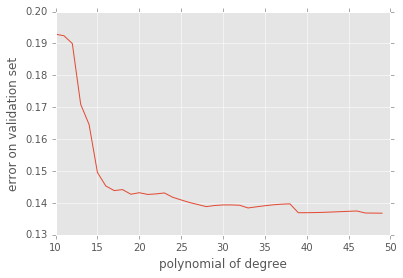

In [56]:
import warnings
warnings.filterwarnings('ignore')

olddata = np.load('data4/num_accident_OH_norm2.npy')

week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
models = []
n = range(10, 50)  # number of degree
loss = np.zeros(40) # record loss of different degree
n_model = 0
for d in n:
    start = 0
    total_loss = np.zeros(7)
    for wd in range(7):
        # Abstract each weekday data
        newdata = np.zeros(shape = (336,2))
        i = start
        j = 0
        while j<7:
            newdata[j*48:j*48+48, :] = olddata[i:i+48, -2:]
            j+=1
            i+=336
        npdata = newdata
        x = npdata[0:240, 0]
        y = npdata[0:240, 1]
        z = np.polyfit(x, y, d)
        fitline = np.poly1d(z)
        models.append(fitline)
 
        # compute test loss
        pre = fitline(npdata[240:288, 0])
        ob = npdata[240:288, -1]
        test_err = (pre - ob)**2
        test_err = np.mean(test_err)
        #print ('{}test loss:\t\t\t{}'.format(week[wd], test_err))
        total_loss[wd] = test_err
        start += 48

    print ('{} degree - average error:\t\t\t{}'.format(d, total_loss.mean()))
    loss[n_model] = total_loss.mean()
    n_model += 1

plt.figure()
plt.plot(range(10, 50), loss)
plt.xlabel('polynomial of degree')
plt.ylabel('error on validation set')
plt.savefig('image/polynomial_degree.eps',format="eps",transparent=True, bbox_inches='tight', pad_inches=0.1)

In [3]:
##### olddata = np.load('data4/num_accident_OH_norm2.npy')
start = time.clock()
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
models = []
total_loss = np.zeros(7)
start = 0
nfig = 1
plt.figure(figsize = (12,10))
for wd in range(7):
    # Abstract each weekday data
    print (week[wd] + ':')
    newdata = np.zeros(shape = (336,2))
    i = start
    j = 0
    while j<7:
        newdata[j*48:j*48+48, :] = olddata[i:i+48, -2:]
        j+=1
        i+=336
    npdata = newdata
    x = npdata[0:240, 0]
    y = npdata[0:240, 1]
    z = np.polyfit(x, y, 49)
    fitline = np.poly1d(z)
    models.append(fitline)
    
    plt.subplot(3,3,nfig)
    plt.plot(fitline(npdata[240:288, 0]), color = 'r', label = 'prediction')
    plt.plot(npdata[240:288, -1], color = 'k', label = 'observation')
#     plt.xlabel('time slot')
#     plt.ylabel('number of accident(normalised)')
    plt.title(week[wd])
    # compute test loss
    pre = fitline(npdata[240:288, 0])
    ob = npdata[240:288, -1]
    test_err = (pre - ob)**2
    test_err = np.mean(test_err)
    print ('{}test loss:\t\t\t{}'.format(week[wd], test_err))
    total_loss[wd] = test_err
    start += 48
    nfig += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('image/polynomial_fit2.eps',format="eps",transparent=True, grid = True, bbox_inches='tight', pad_inches=0.1)
print ('Average error on all weekday:\t\t\t{}'.format(total_loss.mean()))

end = time.clock()
print ("cost time: {:10.6} s".format(end - start))

Sunday:


NameError: name 'olddata' is not defined

### test

Sunday:
one model MAPE:0.283779046891
Sundaytest loss:			0.0844562137551
Monday:
one model MAPE:0.298069356295
Mondaytest loss:			0.164980676341
Tuesday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


one model MAPE:0.324619445223
Tuesdaytest loss:			0.197380305802
Wednesday:
one model MAPE:0.37381671572
Wednesdaytest loss:			0.152771280294
Thursday:
one model MAPE:0.260425540698
Thursdaytest loss:			0.124038834424
Friday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


one model MAPE:0.32071729485
Fridaytest loss:			0.215236652403
Saturday:
one model MAPE:0.268087077407
Saturdaytest loss:			0.0993143264585


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Average MSE on all weekday:			0.148311184211
Average MAPE on all weekday:			0.304216353869


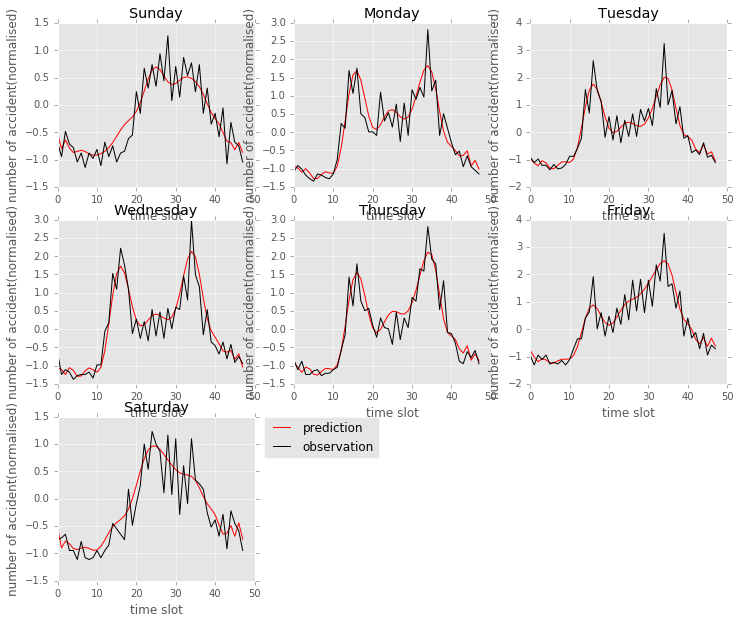

In [23]:
start_time = time.clock()
olddata = np.load('data4/num_accident_OH_norm2.npy')
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
models = []
total_loss = np.zeros(7)
start = 0
nfig = 1
plt.figure(figsize = (12,10))
MAPE = 0
for wd in range(7):
    mape2 = 0
    # Abstract each weekday data
    print (week[wd] + ':')
    newdata = np.zeros(shape = (336,2))
    i = start
    j = 0
    while j<7:
        newdata[j*48:j*48+48, :] = olddata[i:i+48, -2:]
        j+=1
        i+=336
    npdata = newdata
    x = npdata[0:288, 0]
    y = npdata[0:288, 1]
    z = np.polyfit(x, y, 30)
    fitline = np.poly1d(z)
    models.append(fitline)
    
    plt.subplot(3,3,nfig)
    plt.plot(fitline(npdata[288:336, 0]), color = 'r', label = 'prediction')
    plt.plot(npdata[288:336, -1], color = 'k', label = 'observation')
    plt.xlabel('time slot')
    plt.ylabel('number of accident(normalised)')
    plt.title(week[wd])
    # compute test loss
    pre = fitline(npdata[288:336, 0])
    ob = npdata[288:336, -1]
    
    test_err = (pre - ob)**2
    test_err = np.mean(test_err)
    
    ob = ob*30.334586 + 43.699823
    pre = pre*30.334586 + 43.699823
    
    mape2 = abs((ob-pre)/ob)
    MAPE += mape2.mean()
    print ('one model MAPE:{}'.format(mape2.mean()))
    print ('{}test loss:\t\t\t{}'.format(week[wd], test_err))
    total_loss[wd] = test_err
    start += 48
    nfig += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('image/polynomial_fit2.eps',format="eps",transparent=True, grid = True, bbox_inches='tight', pad_inches=0.1)
print ('Average MSE on all weekday:\t\t\t{}'.format(total_loss.mean()))
print ('Average MAPE on all weekday:\t\t\t{}'.format(MAPE/7))

# end_time = time.clock()
# print ("cost time: {} s".format(end_time - start_time))  # compute the time whilt not plotting

In [90]:
ob

array([-0.74831514, -0.71534947, -0.64941812, -0.94610917, -0.94610917,
       -1.11093753, -0.78128081, -1.07797185, -1.11093753, -1.07797185,
       -0.94610917, -1.07797185, -0.94610917, -0.84721215, -0.45162409,
       -0.55052111, -0.64941812, -0.74831514,  0.17472367, -0.48458977,
       -0.08900171,  0.24065501,  0.99886546,  0.53734605,  1.22962516,
        0.99886546,  0.86700277,  0.10879232,  1.16369381,  0.07582665,
        1.09776247, -0.28679574,  0.6032774 , -0.08900171,  1.09776247,
        0.33955202,  0.27362068,  0.17472367, -0.25383006, -0.51755544,
       -0.38569275, -0.6823838 , -0.28679574, -0.9131435 , -0.22086439,
       -0.45162409, -0.58348678, -0.94610917])

In [7]:
from __future__ import print_function

import sys
import os
import time

import numpy as np
import theano
import theano.tensor as T

import lasagne

# ############################# Batch iterator ###############################
# This is just a simple helper function iterating over training data in
# mini-batches of a particular size, optionally in random order. It assumes
# data is available as numpy arrays. For big datasets, you could load numpy
# arrays as memory-mapped files (np.load(..., mmap_mode='r')), or write your
# own custom data iteration function. For small datasets, you can also copy
# them to GPU at once for slightly improved performance. This would involve
# several changes in the main program, though, and is not demonstrated here.
# Notice that this function returns only mini-batches of size `batchsize`.
# If the size of the data is not a multiple of `batchsize`, it will not
# return the last (remaining) mini-batch.

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]


def train_mlp(model='mlp', num_epochs=50, learning_rate=0.001, train_shuffle=True, batchsize = 336):
    start = time.clock()
    # Load the dataset
    print("Loading data...")
    X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

    # Prepare Theano variables for inputs and targets
    input_var = T.tensor3('inputs')
    target_var = T.matrix('targets')

    # Create neural network model (depending on first command line parameter)
    print("Building model and compiling functions...")
    
    network = build_mlp(input_var)
    

    # Create a loss expression for training, i.e., a scalar objective we want
    # to minimize (for our multi-class problem, it is the cross-entropy loss):
    prediction = lasagne.layers.get_output(network)
    loss = lasagne.objectives.squared_error(prediction, target_var)
    loss = loss.mean()
    # We could add some weight decay as well here, see lasagne.regularization.

    # Create update expressions for training, i.e., how to modify the
    # parameters at each training step. Here, we'll use Stochastic Gradient
    # Descent (SGD) with Nesterov momentum, but Lasagne offers plenty more.
    params = lasagne.layers.get_all_params(network, trainable=True)
    updates = lasagne.updates.nesterov_momentum(
            loss, params, learning_rate=learning_rate, momentum=0.9)

    # Create a loss expression for validation/testing. The crucial difference
    # here is that we do a deterministic forward pass through the network,
    # disabling dropout layers.
    test_prediction = lasagne.layers.get_output(network, deterministic=True)
    test_loss = lasagne.objectives.squared_error(test_prediction,
                                                            target_var)
    test_loss = test_loss.mean()
    
    # Compile a function performing a training step on a mini-batch (by giving
    # the updates dictionary) and returning the corresponding training loss:
    train_fn = theano.function([input_var, target_var], loss, updates=updates, allow_input_downcast = True)

    # Compile a second function computing the validation loss and accuracy:
    val_fn = theano.function([input_var, target_var], test_loss, allow_input_downcast = True)

    # Finally, launch the training loop.
    print("Starting training...")
    # We iterate over epochs:
    
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        train_err = 0
        train_batches = 0
        start_time = time.time()
        for batch in iterate_minibatches(X_train, y_train, batchsize = batchsize, shuffle=train_shuffle):
            inputs, targets = batch
            train_err += train_fn(inputs, targets)
            train_batches += 1

        # And a full pass over the validation data:
        val_err = 0
        val_batches = 0
        for batch in iterate_minibatches(X_val, y_val, y_val.shape[0], shuffle=False):
            inputs, targets = batch
            #print (inputs.shape, targets.shape)
            err = val_fn(inputs, targets)
            val_err += err
            val_batches += 1
        
        # save the loss value
        train_loss[epoch] = train_err / train_batches
        val_loss[epoch] = val_err / val_batches
        
        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss:\t\t{:.6f}".format(train_loss[epoch]))
        print("  validation loss:\t\t{:.6f}".format(val_loss[epoch]))    
    
    # compute training time
    end = time.clock()
    print ("training proces costs time: {:10.6} s".format(end - start))
    
    # After training, we compute and print the test error:
    test_err = 0
    test_batches = 0
    for batch in iterate_minibatches(X_test, y_test, y_test.shape[0], shuffle=False):
        inputs, targets = batch
        err = val_fn(inputs, targets)
        test_err += err
        test_batches += 1
    print("Final results:")
    print("  test loss:\t\t\t{:.6f}".format(test_err / test_batches))
    return network, train_loss, val_loss
# Optionally, you could now dump the network weights to a file like this:
# np.savez('model.npz', *lasagne.layers.get_all_param_values(network))
#
# And load them again later on like this:
# with np.load('model.npz') as f:
#     param_values = [f['arr_%d' % i] for i in range(len(f.files))]
# lasagne.layers.set_all_param_values(network, param_values)

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


### ANN network

In [33]:
def load_dataset():
    npdata = np.load('data4/num_accident_OH_norm2.npy')
    npdata = npdata.astype(np.float32)
    X_train, X_val = npdata[0:1680, 0:-1].reshape(1680,1,8), npdata[1680:2016, 0:-1].reshape(336,1,8)
    y_train, y_val = npdata[0:1680, -1].reshape(1680,1), npdata[1680:2016, -1].reshape(336,1)
    x_test, y_test = npdata[2016:2352, 0:-1].reshape(336,1,8), npdata[2016:2352, -1].reshape(336,1)
    #print (X_train.shape, y_train.shape, X_val.shape, y_val.shape, npdata.shape)
    return X_train, y_train, X_val, y_val, x_test, y_test


def build_mlp(input_var=None, units = 15):
    
    # Input layer, specifying the expected input shape of the network
    l_in = lasagne.layers.InputLayer(shape=(None,1,8),
                                     input_var=input_var)

    l_hid1 = lasagne.layers.DenseLayer(
            l_in, num_units = units,
            nonlinearity=lasagne.nonlinearities.sigmoid,
            W=lasagne.init.GlorotUniform())
    
    l_hid2 = lasagne.layers.DenseLayer(
            l_hid1, num_units = units,
            nonlinearity=lasagne.nonlinearities.sigmoid,
            W=lasagne.init.GlorotUniform())
    
    l_hid3 = lasagne.layers.DenseLayer(
            l_hid2, num_units = units,
            nonlinearity=lasagne.nonlinearities.sigmoid,
            W=lasagne.init.GlorotUniform())
        
    l_out = lasagne.layers.DenseLayer(
            l_hid3, num_units=1,
            nonlinearity=lasagne.nonlinearities.linear)

    return l_out

# start = time.clock()
network, train_loss, val_loss = train_mlp(num_epochs=5000, learning_rate=0.02)
# end = time.clock()
# print ("cost time: {:10.6} s".format(end - start))

Loading data...
Building model and compiling functions...
Starting training...
Epoch 1 of 5000 took 0.007s
  training loss:		1.041568
  validation loss:		1.022898
Epoch 2 of 5000 took 0.007s
  training loss:		1.016165
  validation loss:		1.001876
Epoch 3 of 5000 took 0.006s
  training loss:		1.010744
  validation loss:		1.001005
Epoch 4 of 5000 took 0.006s
  training loss:		1.008192
  validation loss:		1.001667
Epoch 5 of 5000 took 0.006s
  training loss:		1.009695
  validation loss:		1.001626
Epoch 6 of 5000 took 0.005s
  training loss:		1.010666
  validation loss:		1.000963
Epoch 7 of 5000 took 0.005s
  training loss:		1.009981
  validation loss:		1.000858
Epoch 8 of 5000 took 0.005s
  training loss:		1.010184
  validation loss:		1.004486
Epoch 9 of 5000 took 0.006s
  training loss:		1.010093
  validation loss:		1.001999
Epoch 10 of 5000 took 0.006s
  training loss:		1.009104
  validation loss:		1.000725
Epoch 11 of 5000 took 0.007s
  training loss:		1.009239
  validation loss:		1.00

In [35]:
np.savez('model/MLP_1.npz', *lasagne.layers.get_all_param_values(network))

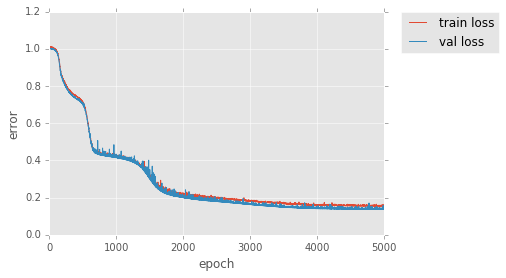

In [36]:
epoch = range(5000)
plt.figure()
plt.plot(epoch, train_loss, label = 'train loss')
plt.plot(epoch, val_loss, label = 'val loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('epoch')
plt.ylabel('error')
plt.savefig('image/MLP_1_epoch.eps',format="eps",transparent=True, bbox_inches='tight', pad_inches=0.1)

MAPE: 0.291246311842
MSE: 133.738156623


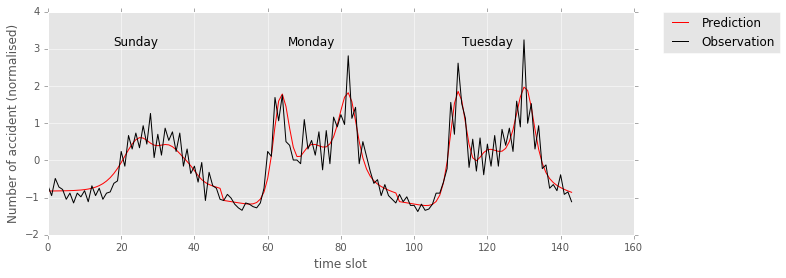

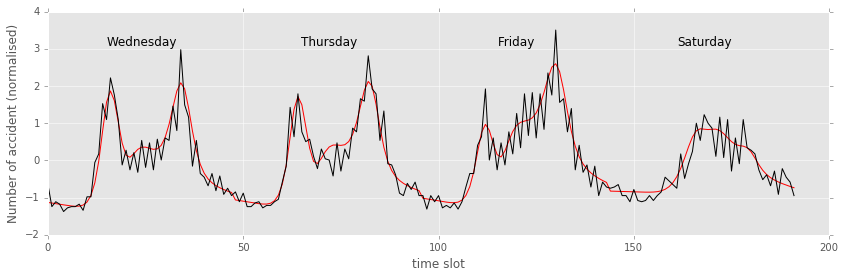

In [12]:
with np.load('model/MLP_1.npz') as f:
    param_values = [f['arr_%d' % i] for i in range(len(f.files))]
lasagne.layers.set_all_param_values(network, param_values)


npdata = np.load('data4/num_accident_OH_norm2.npy')
output = lasagne.layers.get_output(network, inputs= npdata[2016:2352, 0:-1].reshape(336,1,8)).eval()
pre = np.zeros(336)
pre = output.reshape(336)
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
i = 0
plt.figure(figsize = (10.5,4))
plt.plot(pre[0:144], color='r', label = 'Prediction')
plt.plot(npdata[2016:2160, -1], color = 'k', label = 'Observation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time slot')
plt.ylabel('Number of accident (normalised)')
while i < 3:
    plt.text(24+i*48, 3.0, week[i], ha='center', va='bottom',fontsize = 12)
    i+=1
plt.savefig('image/MLP_1_fit_1.eps',format="eps",transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.figure(figsize = (14,4))
plt.plot(pre[144:], color='r')
plt.plot(npdata[2160:2353, -1], color = 'k')
plt.xlabel('time slot')
plt.ylabel('Number of accident (normalised)')
while i < 7:
    plt.text(i*48-120, 3.0, week[i], ha='center', va='bottom',fontsize = 12)
    i+=1
plt.savefig('image/MLP_1_fit_2.eps',format="eps",transparent=True, bbox_inches='tight', pad_inches=0.1)

# Compute MAPE
ob = npdata[2016:, -1]

ob = ob*30.334586 + 43.699823
pre = pre*30.334586 + 43.699823

mape = abs((ob - pre)/ob)
print ('MAPE: {}'.format(mape.mean()))

mse = ((ob - pre)**2).mean()
print ('MSE: {}'.format(mse))

In [22]:
with np.load('model/MLP_1.npz') as f:
    param_values = [f['arr_%d' % i] for i in range(len(f.files))]
lasagne.layers.set_all_param_values(network, param_values)


# compute mean  square error on different weekday
olddata = np.load('data4/num_accident_OH_norm2.npy')
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
npdata = olddata[2016:2352, :]
for wd in range(7):
    # Abstract each weekday data
    x = npdata[wd*48:wd*48+48, 0:-1]
    y = npdata[wd*48:wd*48+48, -1]
    output = lasagne.layers.get_output(network, inputs= x.reshape(48,1,8)).eval()
    pre = output.reshape(48)
    ob = y
    
    test_err = (pre - ob)**2
    test_err = np.mean(test_err)
    
    ob = ob*30.334586 + 43.699823
    pre = pre*30.334586 + 43.699823
    
    mape = abs((ob-pre)/ob)
    
    print ('{} loss MSE MAPE:\t\t\t{}\t\t\t{}'.format(week[wd], test_err, mape.mean()))


Sunday loss MSE MAPE:			0.0874503538449			0.297718786428
Monday loss MSE MAPE:			0.160718222398			0.290720650817
Tuesday loss MSE MAPE:			0.188090392658			0.31820345345
Wednesday loss MSE MAPE:			0.144655954512			0.299575008748
Thursday loss MSE MAPE:			0.123883718036			0.226189873402
Friday loss MSE MAPE:			0.20725022075			0.331044205895
Saturday loss MSE MAPE:			0.105317158728			0.275272204153


### LSTM

In [75]:
def load_dataset():
    npdata = np.load('data4/num_accident_OH_norm2.npy')
    npdata = npdata.astype(np.float32)
    X_train, X_val = npdata[0:1680, 0:-1].reshape(1680,1,8), npdata[1680:2016, 0:-1].reshape(336,1,8)
    y_train, y_val = npdata[0:1680, -1].reshape(1680,1), npdata[1680:2016, -1].reshape(336,1)
    x_test, y_test = npdata[2016:2352, 0:-1].reshape(336,1,8), npdata[2016:2352, -1].reshape(336,1)
    #print (X_train.shape, y_train.shape, X_val.shape, y_val.shape, npdata.shape)
    return X_train, y_train, X_val, y_val, x_test, y_test


def build_mlp(input_var=None, units = 15):
    
    # Input layer, specifying the expected input shape of the network
    l_in = lasagne.layers.InputLayer(shape=(None,1,8),
                                     input_var=input_var)

    l_hid1 = lasagne.layers.LSTMLayer(
            l_in, num_units = units)
    
    l_hid2 = lasagne.layers.LSTMLayer(
            l_hid1, num_units = units)
    
    l_hid3 = lasagne.layers.LSTMLayer(
            l_hid2, num_units = units)
            
    l_out = lasagne.layers.DenseLayer(
            l_hid3, num_units=1,
            nonlinearity=lasagne.nonlinearities.linear)

    return l_out

network, train_loss, val_loss = train_mlp(num_epochs=2500, learning_rate=0.02)


Loading data...
Building model and compiling functions...
Starting training...
Epoch 1 of 2500 took 0.059s
  training loss:		1.008718
  validation loss:		1.001612
Epoch 2 of 2500 took 0.063s
  training loss:		1.008196
  validation loss:		1.002502
Epoch 3 of 2500 took 0.059s
  training loss:		1.008499
  validation loss:		1.002466
Epoch 4 of 2500 took 0.057s
  training loss:		1.008516
  validation loss:		1.002344
Epoch 5 of 2500 took 0.056s
  training loss:		1.008411
  validation loss:		1.002416
Epoch 6 of 2500 took 0.058s
  training loss:		1.008304
  validation loss:		1.002104
Epoch 7 of 2500 took 0.056s
  training loss:		1.008379
  validation loss:		1.001827
Epoch 8 of 2500 took 0.056s
  training loss:		1.008334
  validation loss:		1.001978
Epoch 9 of 2500 took 0.056s
  training loss:		1.008491
  validation loss:		1.002359
Epoch 10 of 2500 took 0.057s
  training loss:		1.008334
  validation loss:		1.002008
Epoch 11 of 2500 took 0.058s
  training loss:		1.008524
  validation loss:		1.00

In [ ]:
np.savez('model/LSTM_3.npz', *lasagne.layers.get_all_param_values(network))

MAPE: 0.302477100322
MSE: 115.650483046


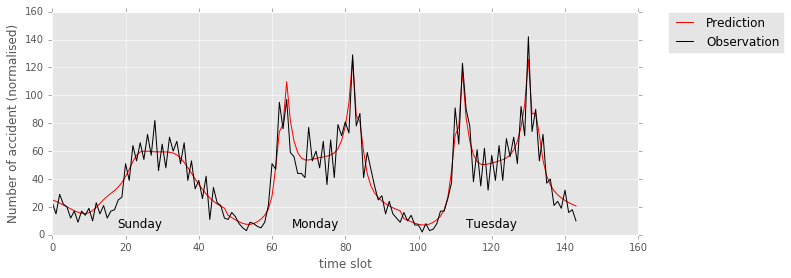

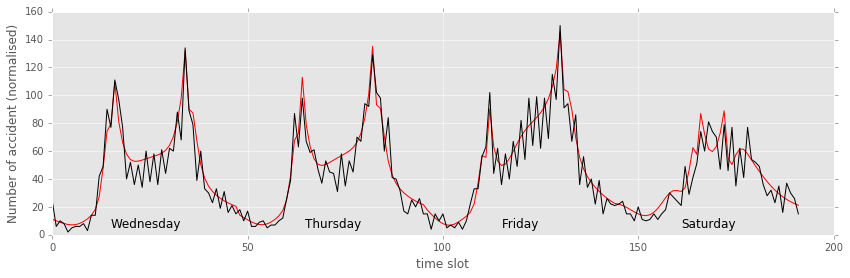

In [17]:
with np.load('model/model3.npz') as f:
    param_values = [f['arr_%d' % i] for i in range(len(f.files))]
lasagne.layers.set_all_param_values(network, param_values)

# epoch = range(2500)
# plt.figure()
# plt.plot(epoch, train_loss, label = 'train loss')
# plt.plot(epoch, val_loss, label = 'val loss')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlabel('epoch')
# plt.ylabel('error')


npdata = np.load('data4/num_accident_OH_norm2.npy')
output = lasagne.layers.get_output(network, inputs= npdata[2016:2352, 0:-1].reshape(336,1,8)).eval()
pre = np.zeros(336)
pre = output.reshape(336)
ob = npdata[2016:, -1]
ob = ob*30.334586 + 43.699823
pre = pre*30.334586 + 43.699823

week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
i = 0
plt.figure(figsize = (10.5,4))
plt.plot(pre[0:144], color='r', label = 'Prediction')
plt.plot(ob[0:144], color = 'k', label = 'Observation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 12)
plt.xlabel('time slot')
plt.ylabel('Number of accident (normalised)')
while i < 3:
    plt.text(24+i*48, 3.0, week[i], ha='center', va='bottom',fontsize = 12)
    i+=1
#plt.savefig('image/LSTM1_fit_1.eps',format="eps",transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.figure(figsize = (14,4))
plt.plot(pre[144:], color='r')
plt.plot(ob[144:], color = 'k')
plt.xlabel('time slot')
plt.ylabel('Number of accident (normalised)')
while i < 7:
    plt.text(i*48-120, 3.0, week[i], ha='center', va='bottom',fontsize = 12)
    i+=1

# Compute MAPE




mape = abs((ob - pre)/ob)
print ('MAPE: {}'.format(mape.mean()))

mse = ((ob - pre)**2).mean()
print ('MSE: {}'.format(mse))

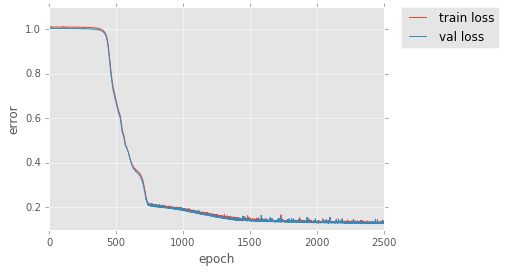

In [12]:
epoch = range(2500)
plt.figure()
plt.plot(epoch, train_loss, label = 'train loss')
plt.plot(epoch, val_loss, label = 'val loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('epoch')
plt.ylabel('error')

In [18]:
# compute mean  square error on different weekday

with np.load('model/model3.npz') as f:
    param_values = [f['arr_%d' % i] for i in range(len(f.files))]
lasagne.layers.set_all_param_values(network, param_values)

olddata = np.load('data4/num_accident_OH_norm2.npy')
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
npdata = olddata[2016:2352, :]
for wd in range(7):
    # Abstract each weekday data
    x = npdata[wd*48:wd*48+48, 0:-1]
    y = npdata[wd*48:wd*48+48, -1]
    output = lasagne.layers.get_output(network, inputs= x.reshape(48,1,8)).eval()
    pre = output.reshape(48)
    ob = y
    
    test_err = (pre - ob)**2
    test_err = np.mean(test_err)
    
    ob = ob*30.334586 + 43.699823
    pre = pre*30.334586 + 43.699823

    
    mape = abs((ob-pre)/ob)
    
    print ('{} loss MSE MAPE:\t\t\t{}\t\t\t{}'.format(week[wd], test_err, mape.mean()))


Sunday loss MSE MAPE:			0.0855193259679			0.290536741023
Monday loss MSE MAPE:			0.133777033078			0.299238001347
Tuesday loss MSE MAPE:			0.124350004288			0.335182834549
Wednesday loss MSE MAPE:			0.126956463027			0.342221049773
Thursday loss MSE MAPE:			0.107963814129			0.248717365574
Friday loss MSE MAPE:			0.166426553521			0.321678232192
Saturday loss MSE MAPE:			0.134777207541			0.279765477797


In [84]:
def load_dataset():
    npdata = np.load('data4/num_accident_OH_norm2.npy')
    npdata = npdata.astype(np.float32)
    X_train, X_val = npdata[0:1680, 0:-1].reshape(1680,1,8), npdata[1680:2016, 0:-1].reshape(336,1,8)
    y_train, y_val = npdata[0:1680, -1].reshape(1680,1), npdata[1680:2016, -1].reshape(336,1)
    x_test, y_test = npdata[2016:2352, 0:-1].reshape(336,1,8), npdata[2016:2352, -1].reshape(336,1)
    #print (X_train.shape, y_train.shape, X_val.shape, y_val.shape, npdata.shape)
    return X_train, y_train, X_val, y_val, x_test, y_test


def build_mlp(input_var=None, units = 15):
    
    # Input layer, specifying the expected input shape of the network
    l_in = lasagne.layers.InputLayer(shape=(None,1,8),
                                     input_var=input_var)

    l_hid1 = lasagne.layers.DenseLayer(
            l_in, num_units = units,
            nonlinearity=lasagne.nonlinearities.sigmoid,
            W=lasagne.init.GlorotUniform())
    
    l_hid2 = lasagne.layers.DenseLayer(
            l_hid1, num_units = units,
            nonlinearity=lasagne.nonlinearities.sigmoid,
            W=lasagne.init.GlorotUniform())
    
    l_hid3 = lasagne.layers.DenseLayer(
            l_hid2, num_units = units,
            nonlinearity=lasagne.nonlinearities.sigmoid,
            W=lasagne.init.GlorotUniform())
        
    l_out = lasagne.layers.DenseLayer(
            l_hid3, num_units=1,
            nonlinearity=lasagne.nonlinearities.linear)

    return l_out

# start = time.clock()
network, train_loss, val_loss = train_mlp(num_epochs=5000, learning_rate=0.02)
# end = time.clock()
# print ("cost time: {:10.6} s".format(end - start))

Loading data...
Building model and compiling functions...
Starting training...
Epoch 1 of 5000 took 0.007s
  training loss:		1.015591
  validation loss:		1.006939
Epoch 2 of 5000 took 0.006s
  training loss:		1.014509
  validation loss:		1.003073
Epoch 3 of 5000 took 0.005s
  training loss:		1.010359
  validation loss:		1.002518
Epoch 4 of 5000 took 0.005s
  training loss:		1.009939
  validation loss:		1.002574
Epoch 5 of 5000 took 0.006s
  training loss:		1.011058
  validation loss:		1.001562
Epoch 6 of 5000 took 0.006s
  training loss:		1.009174
  validation loss:		1.004030
Epoch 7 of 5000 took 0.005s
  training loss:		1.008815
  validation loss:		1.004434
Epoch 8 of 5000 took 0.005s
  training loss:		1.010650
  validation loss:		1.002695
Epoch 9 of 5000 took 0.005s
  training loss:		1.008927
  validation loss:		1.002401
Epoch 10 of 5000 took 0.005s
  training loss:		1.008894
  validation loss:		1.001496
Epoch 11 of 5000 took 0.005s
  training loss:		1.010332
  validation loss:		1.00

create network

In [14]:
def load_dataset():
    npdata = np.load('data4/num_accident_OH_norm2.npy')
    npdata = npdata.astype(np.float32)
    X_train, X_val = npdata[0:1680, 0:-1].reshape(1680,1,8), npdata[1680:2016, 0:-1].reshape(336,1,8)
    y_train, y_val = npdata[0:1680, -1].reshape(1680,1), npdata[1680:2016, -1].reshape(336,1)
    x_test, y_test = npdata[2016:2352, 0:-1].reshape(336,1,8), npdata[2016:2352, -1].reshape(336,1)
    #print (X_train.shape, y_train.shape, X_val.shape, y_val.shape, npdata.shape)
    return X_train, y_train, X_val, y_val, x_test, y_test


def build_mlp(input_var=None, units = 15):
    
    # Input layer, specifying the expected input shape of the network
    l_in = lasagne.layers.InputLayer(shape=(None,1,8),
                                     input_var=input_var)

    l_hid1 = lasagne.layers.LSTMLayer(
            l_in, num_units = units)
    
    l_hid2 = lasagne.layers.LSTMLayer(
            l_hid1, num_units = units)
    
    l_hid3 = lasagne.layers.LSTMLayer(
            l_hid2, num_units = units)
            
    l_out = lasagne.layers.DenseLayer(
            l_hid3, num_units=1,
            nonlinearity=lasagne.nonlinearities.linear)

    return l_out

network, train_loss, val_loss = train_mlp(num_epochs=1, learning_rate=0.02)


Loading data...
Building model and compiling functions...
Starting training...
Epoch 1 of 1 took 0.081s
  training loss:		1.008440
  validation loss:		1.001795
training proces costs time:    58.1324 s
Final results:
  test loss:			0.956922


In [19]:
def load_dataset():
    npdata = np.load('data4/num_accident_OH_norm2.npy')
    npdata = npdata.astype(np.float32)
    X_train, X_val = npdata[0:1680, 0:-1].reshape(1680,1,8), npdata[1680:2016, 0:-1].reshape(336,1,8)
    y_train, y_val = npdata[0:1680, -1].reshape(1680,1), npdata[1680:2016, -1].reshape(336,1)
    x_test, y_test = npdata[2016:2352, 0:-1].reshape(336,1,8), npdata[2016:2352, -1].reshape(336,1)
    #print (X_train.shape, y_train.shape, X_val.shape, y_val.shape, npdata.shape)
    return X_train, y_train, X_val, y_val, x_test, y_test


def build_mlp(input_var=None, units = 15):
    
    # Input layer, specifying the expected input shape of the network
    l_in = lasagne.layers.InputLayer(shape=(None,1,8),
                                     input_var=input_var)

    l_hid1 = lasagne.layers.DenseLayer(
            l_in, num_units = units,
            nonlinearity=lasagne.nonlinearities.sigmoid,
            W=lasagne.init.GlorotUniform())
    
    l_hid2 = lasagne.layers.DenseLayer(
            l_hid1, num_units = units,
            nonlinearity=lasagne.nonlinearities.sigmoid,
            W=lasagne.init.GlorotUniform())
    
    l_hid3 = lasagne.layers.DenseLayer(
            l_hid2, num_units = units,
            nonlinearity=lasagne.nonlinearities.sigmoid,
            W=lasagne.init.GlorotUniform())
        
    l_out = lasagne.layers.DenseLayer(
            l_hid3, num_units=1,
            nonlinearity=lasagne.nonlinearities.linear)

    return l_out

# start = time.clock()
network, train_loss, val_loss = train_mlp(num_epochs=1, learning_rate=0.02)
# end = time.clock()
# print ("cost time: {:10.6} s".format(end - start))

Loading data...
Building model and compiling functions...
Starting training...
Epoch 1 of 1 took 0.007s
  training loss:		1.076152
  validation loss:		1.021513
training proces costs time:    1.53153 s
Final results:
  test loss:			0.964468
